In [1]:
import tensorflow as tf
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [2]:
pl_data = pd.read_csv('Datasets/nba-players-stats/player_data.csv')
pl = pd.read_csv('Datasets/nba-players-stats/Players.csv',index_col = 0)
season = pd.read_csv('Datasets/nba-players-stats/Seasons_Stats.csv',index_col = 0)

In [3]:
pl_data.head(10)

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   
5  Shareef Abdur-Rahim        1997      2008        F    6-9   225.0   
6        Tom Abernethy        1977      1981        F    6-7   220.0   
7          Forest Able        1957      1957        G    6-3   180.0   
8       John Abramovic        1947      1948        F    6-3   195.0   
9         Alex Abrines        2017      2018      G-F    6-6   190.0   

          birth_date                                college  
0      June 24, 1968                        Duke University  
1      April 7, 1946                  Iowa State University  
2     April 16, 1947  University of California, Los Angeles  
3      March 9, 1969             Louisiana State University  
4   November 3, 1974              San Jose State University  
5  December 11, 1976               University of California  
6        May 6, 1954                     Indiana University  
7      July 27, 1932            Western Kentucky University  
8   February 9, 1919         Salem International University  
9     August 1, 1993                                    NaN

In [4]:
pl_data.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height          1
weight          6
birth_date     31
college       302
dtype: int64

In [5]:
pl_data[pl_data["height"].isnull()]

name  year_start  year_end position height  weight    birth_date  \
2142  George Karl        1974      1978      NaN    NaN     NaN  May 12, 1952   

                           college  
2142  University of North Carolina

In [6]:
pl[pl["Player"] == "George Karl"]
#here we can find in the other dataframe the missing values for this player

Player  height  weight                       collage    born  \
1175  George Karl   190.0    83.0  University of North Carolina  1952.0   

      birth_city   birth_state  
1175  Penn Hills  Pennsylvania

In [7]:
pl_data.height[pl_data.name == "George Karl"] = "6-2"
pl_data.weight[pl_data.name == "George Karl"] = 182
#converted the weight from kg to lbs and the height from cm to feet

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
pl_data.iloc[2142]

name                           George Karl
year_start                            1974
year_end                              1978
position                               NaN
height                                 6-2
weight                                 182
birth_date                    May 12, 1952
college       University of North Carolina
Name: 2142, dtype: object

In [9]:
#converting feet to centimetres to unify with the other dataset
for i in range(len(pl_data)):
    l = re.findall("\d+",pl_data["height"][i])
    #print(type(l[1]))
    a = int(l[0])+int(l[1])*0.1
    pl_data["height"][i] = int(30.48 * a)


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
#data in centimetres
pl_data["height"]

0       213
1       210
2       219
3       185
4       201
5       210
6       204
7       192
8       192
9       201
10      198
11      182
12      216
13      201
14      204
15      210
16      201
17      198
18      195
19      198
20      182
21      213
22      204
23      213
24      185
25      204
26      198
27      198
28      201
29      188
       ... 
4520    201
4521    188
4522    204
4523    204
4524    204
4525    198
4526    201
4527    207
4528    213
4529    210
4530    188
4531    204
4532    213
4533    185
4534    192
4535    195
4536    216
4537    213
4538    207
4539    213
4540    213
4541    213
4542    192
4543    213
4544    207
4545    216
4546    216
4547    185
4548    216
4549    192
Name: height, Length: 4550, dtype: object

In [11]:
#we check the pl dataframe for the players whom the weight is null in pl_data but we can find it in pl
 

for i in range(len(pl_data)):
    if pl_data["weight"].isnull()[i] == True:
        #print(pl_data["name"][i])
        for j in range(len(pl)):
            if pl_data["name"][i] == pl["Player"][j]:
                pl_data["weight"][i] = pl["weight"][j] 

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
#we went from 5 missing weights to 2
pl_data.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height          0
weight          2
birth_date     31
college       302
dtype: int64

In [13]:
#for the 2 left, we can collecte the average weight for all players with same height
from statistics import mean
for i in range(len(pl_data)):
    if pl_data["weight"].isnull()[i] == True:
        h = []
        for j in range(len(pl_data)):
            if pl_data["height"][j] == pl_data["height"][i] and pl_data["weight"].isnull()[j] == False:
                h.append(pl_data["weight"][j]) 
        pl_data["weight"][i] = mean(h)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
#now we have 0 nul values for weights
pl_data.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height          0
weight          0
birth_date     31
college       302
dtype: int64

In [15]:
#same for the weight, goes from lbs to kg
for i in range(len(pl_data)):
    pl_data["weight"][i] = int(0.453592 * pl_data["weight"][i])
    
pl_data["weight"]   

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       108.0
1       106.0
2       102.0
3        73.0
4       101.0
5       102.0
6        99.0
7        81.0
8        88.0
9        86.0
10       83.0
11       83.0
12       99.0
13       95.0
14      108.0
15       95.0
16       95.0
17       95.0
18       99.0
19       94.0
20       73.0
21      115.0
22       97.0
23      110.0
24       79.0
25      111.0
26       95.0
27       91.0
28      105.0
29       86.0
        ...  
4520     97.0
4521     81.0
4522     96.0
4523     99.0
4524     95.0
4525     95.0
4526     99.0
4527    100.0
4528     99.0
4529     92.0
4530     77.0
4531     97.0
4532    108.0
4533     79.0
4534     92.0
4535     95.0
4536    111.0
4537    114.0
4538     95.0
4539    104.0
4540    115.0
4541    113.0
4542     88.0
4543    108.0
4544     97.0
4545    113.0
4546    108.0
4547     77.0
4548    120.0
4549     88.0
Name: weight, Length: 4550, dtype: float64

In [16]:
pl_data[pl_data["position"].isnull()]

name  year_start  year_end position height  weight    birth_date  \
2142  George Karl        1974      1978      NaN    188    82.0  May 12, 1952   

                           college  
2142  University of North Carolina

In [17]:
# Google research for his position xD
pl_data.position[pl_data["name"]=="George Karl"] = "G"

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
pl_data.iloc[2142]

name                           George Karl
year_start                            1974
year_end                              1978
position                                 G
height                                 188
weight                                  82
birth_date                    May 12, 1952
college       University of North Carolina
Name: 2142, dtype: object

In [19]:
pl.head(10)

Player  height  weight                          collage    born  \
0  Curly Armstrong   180.0    77.0               Indiana University  1918.0   
1     Cliff Barker   188.0    83.0           University of Kentucky  1921.0   
2    Leo Barnhorst   193.0    86.0         University of Notre Dame  1924.0   
3       Ed Bartels   196.0    88.0  North Carolina State University  1925.0   
4      Ralph Beard   178.0    79.0           University of Kentucky  1927.0   
5       Gene Berce   180.0    79.0             Marquette University  1926.0   
6    Charlie Black   196.0    90.0             University of Kansas  1921.0   
7      Nelson Bobb   183.0    77.0                Temple University  1924.0   
8  Jake Bornheimer   196.0    90.0               Muhlenberg College  1927.0   
9     Vince Boryla   196.0    95.0             University of Denver  1927.0   

      birth_city   birth_state  
0            NaN           NaN  
1       Yorktown       Indiana  
2            NaN           NaN  
3            NaN           NaN  
4    Hardinsburg      Kentucky  
5            NaN           NaN  
6           Arco         Idaho  
7   Philadelphia  Pennsylvania  
8  New Brunswick    New Jersey  
9   East Chicago       Indiana

In [20]:
new_col = pl.columns.values
new_col[3] = "college"
pl.columns = new_col
pl.columns

Index(['Player', 'height', 'weight', 'college', 'born', 'birth_city',
       'birth_state'],
      dtype='object')

In [21]:
pl["born"].isnull().sum()

1

In [22]:
pl[pl["born"].isnull()]

Player  height  weight college  born birth_city birth_state
223    NaN     NaN     NaN     NaN   NaN        NaN         NaN

In [23]:
pl = pl.drop([223],axis = 0)
pl["born"].isnull().sum()

0

In [24]:
pl.isnull().sum()

Player           0
height           0
weight           0
college        348
born             0
birth_city     469
birth_state    482
dtype: int64

In [25]:
pl.describe()

height       weight        born
count  3921.000000  3921.000000  3921.00000
mean    198.704922    94.783219  1962.37975
std       9.269761    12.039515    20.33491
min     160.000000    60.000000  1913.00000
25%     190.000000    86.000000  1948.00000
50%     198.000000    95.000000  1964.00000
75%     206.000000   102.000000  1979.00000
max     231.000000   163.000000  1997.00000

In [26]:
season.head(20)

Year           Player  Pos   Age   Tm     G  GS  MP  PER    TS%   ...    \
0   1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368   ...     
1   1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN  0.435   ...     
2   1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394   ...     
3   1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN  0.312   ...     
4   1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN  0.308   ...     
5   1950.0       Ed Bartels    F  24.0  NYK   2.0 NaN NaN  NaN  0.376   ...     
6   1950.0      Ralph Beard    G  22.0  INO  60.0 NaN NaN  NaN  0.422   ...     
7   1950.0       Gene Berce  G-F  23.0  TRI   3.0 NaN NaN  NaN  0.275   ...     
8   1950.0    Charlie Black  F-C  28.0  TOT  65.0 NaN NaN  NaN  0.346   ...     
9   1950.0    Charlie Black  F-C  28.0  FTW  36.0 NaN NaN  NaN  0.362   ...     
10  1950.0    Charlie Black  F-C  28.0  AND  29.0 NaN NaN  NaN  0.326   ...     
11  1950.0      Nelson Bobb   PG  25.0  PHW  57.0 NaN NaN  NaN  0.396   ...     
12  1950.0  Jake Bornheimer  F-C  22.0  PHW  60.0 NaN NaN  NaN  0.356   ...     
13  1950.0     Vince Boryla   SF  22.0  NYK  59.0 NaN NaN  NaN  0.426   ...     
14  1950.0        Don Boven  F-G  24.0  WAT  62.0 NaN NaN  NaN  0.461   ...     
15  1950.0    Harry Boykoff    C  27.0  WAT  61.0 NaN NaN  NaN  0.479   ...     
16  1950.0      Joe Bradley    G  21.0  CHS  46.0 NaN NaN  NaN  0.289   ...     
17  1950.0      Bob Brannum   PF  24.0  SHE  59.0 NaN NaN  NaN  0.408   ...     
18  1950.0       Carl Braun  G-F  22.0  NYK  67.0 NaN NaN  NaN  0.434   ...     
19  1950.0    Frankie Brian    G  26.0  AND  64.0 NaN NaN  NaN  0.415   ...     

      FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF     PTS  
0   0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0   458.0  
1   0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0   279.0  
2   0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0   438.0  
3   0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0    63.0  
4   0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0    59.0  
5   0.667  NaN  NaN  NaN    0.0  NaN  NaN  NaN    2.0     4.0  
6   0.762  NaN  NaN  NaN  233.0  NaN  NaN  NaN  132.0   895.0  
7   0.000  NaN  NaN  NaN    2.0  NaN  NaN  NaN    6.0    10.0  
8   0.651  NaN  NaN  NaN  163.0  NaN  NaN  NaN  273.0   661.0  
9   0.632  NaN  NaN  NaN   75.0  NaN  NaN  NaN  140.0   382.0  
10  0.688  NaN  NaN  NaN   88.0  NaN  NaN  NaN  133.0   279.0  
11  0.626  NaN  NaN  NaN   46.0  NaN  NaN  NaN   97.0   242.0  
12  0.667  NaN  NaN  NaN   40.0  NaN  NaN  NaN  111.0   254.0  
13  0.764  NaN  NaN  NaN   95.0  NaN  NaN  NaN  203.0   612.0  
14  0.688  NaN  NaN  NaN  137.0  NaN  NaN  NaN  255.0   656.0  
15  0.775  NaN  NaN  NaN  149.0  NaN  NaN  NaN  229.0   779.0  
16  0.395  NaN  NaN  NaN   36.0  NaN  NaN  NaN   51.0    87.0  
17  0.690  NaN  NaN  NaN  205.0  NaN  NaN  NaN  279.0   713.0  
18  0.762  NaN  NaN  NaN  247.0  NaN  NaN  NaN  188.0  1031.0  
19  0.824  NaN  NaN  NaN  189.0  NaN  NaN  NaN  192.0  1138.0  

[20 rows x 52 columns]

In [27]:
season.isnull().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [28]:
#first we delete all the empty rows that contains no players
season[season["Year"].isnull()]

Year Player  Pos  Age   Tm   G  GS  MP  PER  TS% ...   FT%  ORB  DRB  \
312     NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
487     NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
618     NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
779     NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
911     NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1021    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1128    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1236    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1348    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1459    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1577    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1682    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1808    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
1942    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
2078    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
2211    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
2347    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
2481    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
2659    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
2866    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
3068    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
3314    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
3580    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
3850    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
4096    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
4373    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
4648    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
5006    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
5381    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
5726    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
...     ...    ...  ...  ...  ...  ..  ..  ..  ...  ... ...   ...  ...  ...   
8680    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
9107    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
9546    NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
10006   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
10448   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
10907   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
11357   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
11839   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
12292   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
12838   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
13413   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
13961   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
14469   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
14966   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
15504   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
16005   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
16489   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
17075   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN ...   NaN  NaN  NaN   
17661   NaN    NaN  NaN  NaN  NaN NaN NaN NaN  NaN  NaN .

In [29]:
h = season.index[season["Year"].isnull()].tolist()
season.drop(index = h,inplace=True)
season[season["Year"].isnull()]

Empty DataFrame
Columns: [Year, Player, Pos, Age, Tm, G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, blanl, OWS, DWS, WS, WS/48, blank2, OBPM, DBPM, BPM, VORP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
Index: []

[0 rows x 52 columns]

In [30]:
#drop the 2 empty columns blanl & blank2
season.drop(["blank2","blanl"],axis = 1,inplace=True)

In [31]:
season.isnull().sum()

Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
GS        6391
MP         486
PER        523
TS%         86
3PAr      5785
FTr         99
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
USG%      4984
OWS         39
DWS         39
WS          39
WS/48      523
OBPM      3827
DBPM      3827
BPM       3827
VORP      3827
FG           0
FGA          0
FG%         99
3P        5697
3PA       5697
3P%       9208
2P           0
2PA          0
2P%        128
eFG%        99
FT           0
FTA          0
FT%        858
ORB       3827
DRB       3827
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PF           0
PTS          0
dtype: int64

In [32]:
#sub dataset from season, containing columns with low amount of null values to none 
#and selected as the metrics contributing the most to player succcess
seasonup = season[["Year","Player","Pos","Age","PTS","AST","FT","TS%","PF","WS"]]
seasonup.head(10)

Year           Player  Pos   Age    PTS    AST     FT    TS%     PF   WS
0  1950.0  Curly Armstrong  G-F  31.0  458.0  176.0  170.0  0.368  217.0  3.5
1  1950.0     Cliff Barker   SG  29.0  279.0  109.0   75.0  0.435   99.0  2.2
2  1950.0    Leo Barnhorst   SF  25.0  438.0  140.0   90.0  0.394  192.0  3.6
3  1950.0       Ed Bartels    F  24.0   63.0   20.0   19.0  0.312   29.0 -0.6
4  1950.0       Ed Bartels    F  24.0   59.0   20.0   17.0  0.308   27.0 -0.6
5  1950.0       Ed Bartels    F  24.0    4.0    0.0    2.0  0.376    2.0  0.0
6  1950.0      Ralph Beard    G  22.0  895.0  233.0  215.0  0.422  132.0  4.8
7  1950.0       Gene Berce  G-F  23.0   10.0    2.0    0.0  0.275    6.0 -0.1
8  1950.0    Charlie Black  F-C  28.0  661.0  163.0  209.0  0.346  273.0  2.8
9  1950.0    Charlie Black  F-C  28.0  382.0   75.0  132.0  0.362  140.0  1.5

In [33]:
df = pd.merge(pl,seasonup,how="right",on="Player")
df.drop(["birth_city","birth_state"],axis = 1,inplace = True)
df.head(5)

Player  height  weight                 college    born    Year  \
0  Curly Armstrong   180.0    77.0      Indiana University  1918.0  1950.0   
1  Curly Armstrong   180.0    77.0      Indiana University  1918.0  1951.0   
2     Cliff Barker   188.0    83.0  University of Kentucky  1921.0  1950.0   
3     Cliff Barker   188.0    83.0  University of Kentucky  1921.0  1951.0   
4     Cliff Barker   188.0    83.0  University of Kentucky  1921.0  1952.0   

   Pos   Age    PTS    AST     FT    TS%     PF   WS  
0  G-F  31.0  458.0  176.0  170.0  0.368  217.0  3.5  
1  G-F  32.0  202.0   77.0   58.0  0.372   97.0  0.6  
2   SG  29.0  279.0  109.0   75.0  0.435   99.0  2.2  
3   SG  30.0  152.0  115.0   50.0  0.322   98.0 -0.2  
4   SG  31.0  126.0   70.0   30.0  0.343   56.0  0.1

In [34]:
df.isnull().sum()

Player        0
height        0
weight        0
college    2223
born          0
Year          0
Pos           0
Age           8
PTS           0
AST           0
FT            0
TS%          86
PF            0
WS           39
dtype: int64

In [35]:
#since we decided to try and predict the win share for players (their contribution to wins), we will get rid
# of the 39 null values
print(len(df))
#the print shows that 39 is negligible in front of the length of the dataset
df.dropna(subset=["WS"],inplace = True)
df.dropna(subset=["TS%"],inplace = True)
df["WS"].isnull().sum()

24624


0

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


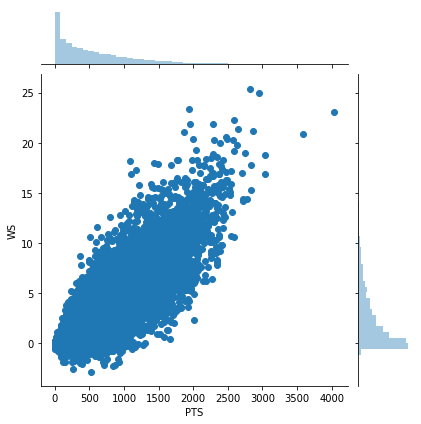

In [36]:
sns.jointplot(x="PTS",y="WS",data=df)
#big correlation between PTS and WS

In [37]:
df[df["PTS"]>3000]
#Exceptional players, having scored such number of points in a season

Player  height  weight                       college    born  \
1902  Wilt Chamberlain*   216.0   124.0          University of Kansas  1936.0   
1903  Wilt Chamberlain*   216.0   124.0          University of Kansas  1936.0   
1904  Wilt Chamberlain*   216.0   124.0          University of Kansas  1936.0   
9605    Michael Jordan*   198.0    88.0  University of North Carolina  1963.0   

        Year Pos   Age     PTS    AST     FT    TS%     PF    WS  
1902  1961.0   C  24.0  3033.0  148.0  531.0  0.519  130.0  18.8  
1903  1962.0   C  25.0  4029.0  192.0  835.0  0.536  123.0  23.1  
1904  1963.0   C  26.0  3586.0  275.0  660.0  0.550  136.0  20.9  
9605  1987.0  SG  23.0  3041.0  377.0  833.0  0.562  237.0  16.9

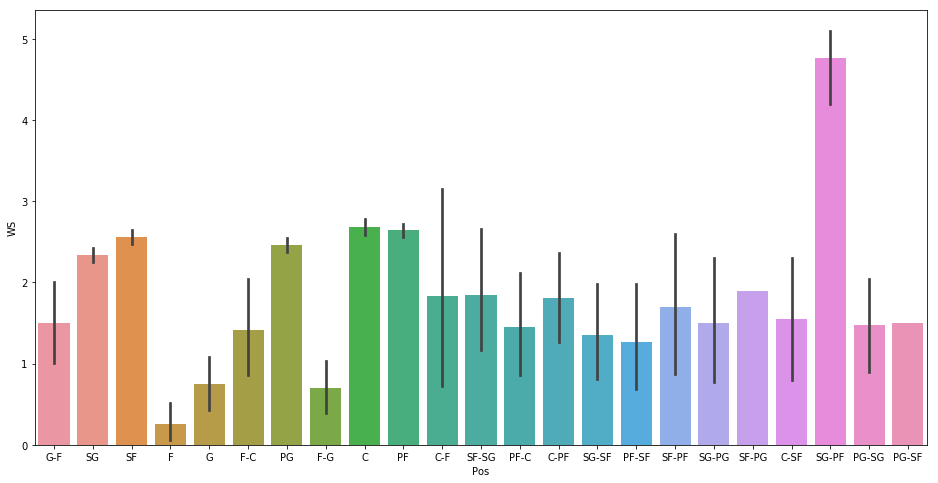

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(x="Pos",y="WS",data=df)
#Win contribution by Player position (WS = Win Share)

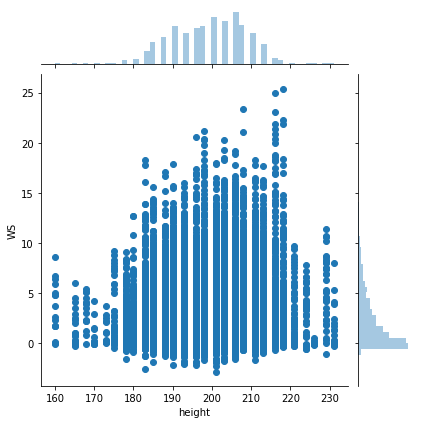

In [39]:
sns.jointplot(x="height",y="WS",data=df)
#the height apparently doesnt contribute in a clear way, to the WS

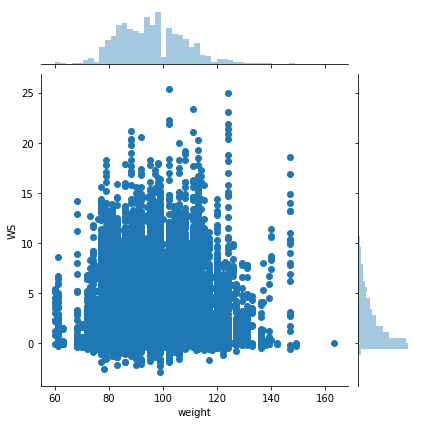

In [40]:
sns.jointplot(x="weight",y="WS",data=df)
#the weight apparently doesnt contribute in a clear way, to the WS

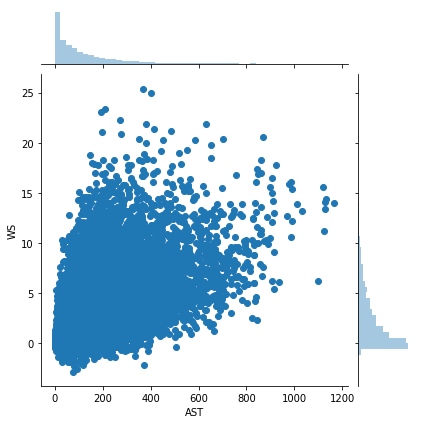

In [41]:
sns.jointplot(x="AST",y="WS",data=df)
#assists play a part in the WS

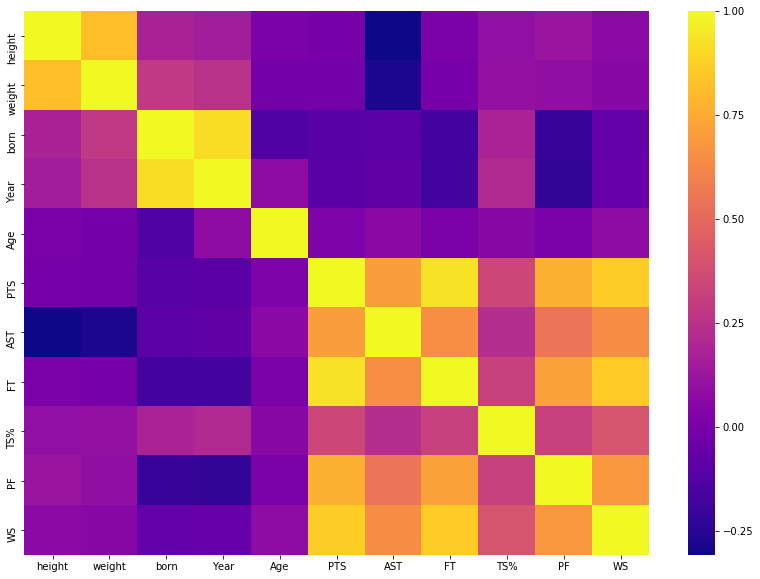

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap="plasma")
#we can clearly see that what correlates with Win Share isnt height or weight and so on
# its more the game stats like PTS and Assists that play the big role
#and so they will be the chosen parametres for training our prediction model

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
#Scaling the data to have similar range of values
ss= StandardScaler()

In [45]:
X = df[['PTS','AST','FT','TS%','PF']]
y = df['WS']
X.head(5)

PTS    AST     FT    TS%     PF
0  458.0  176.0  170.0  0.368  217.0
1  202.0   77.0   58.0  0.372   97.0
2  279.0  109.0   75.0  0.435   99.0
3  152.0  115.0   50.0  0.322   98.0
4  126.0   70.0   30.0  0.343   56.0

In [46]:
X = ss.fit_transform(X)

In [47]:
y = np.array(y).reshape(-1,1)
y=ss.fit_transform(y)

In [48]:
X

array([[-0.1097409 ,  0.44654507,  0.59280547, -1.32473514,  1.18433253],
       [-0.62893911, -0.2814663 , -0.39451087, -1.2823899 , -0.23296733],
       [-0.47277402, -0.04614949, -0.24465035, -0.61545231, -0.20934566],
       ...,
       [-0.99197224, -0.81828276, -0.87935371, -1.55763398, -1.17783389],
       [-0.55187063, -0.58296595, -0.63252463,  0.10441683, -0.45737314],
       [-0.46263343, -0.62708785, -0.6237093 ,  0.57021451, -0.59910312]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
from keras.models import Sequential
from keras.layers import Dense

In [91]:
#Implementing a Neural net with keras
model = Sequential()
model.add(Dense(3,input_dim = 5,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="linear"))

In [92]:
from keras import metrics
model.compile(optimizer="adam",loss="mse", metrics=[metrics.mean_squared_error])

In [93]:
hist = model.fit(X_train,y_train,epochs=50,batch_size=16)

Epoch 1/50
17149/17149 [==============================] - 3s 184us/step - loss: 0.7337 - mean_squared_error: 0.7337
Epoch 2/50
17149/17149 [==============================] - 2s 137us/step - loss: 0.2462 - mean_squared_error: 0.2462
Epoch 3/50
17149/17149 [==============================] - 2s 143us/step - loss: 0.1783 - mean_squared_error: 0.1783
Epoch 4/50
17149/17149 [==============================] - 2s 133us/step - loss: 0.1710 - mean_squared_error: 0.1710
Epoch 5/50
17149/17149 [==============================] - 2s 139us/step - loss: 0.1682 - mean_squared_error: 0.1682
Epoch 6/50
17149/17149 [==============================] - 2s 137us/step - loss: 0.1665 - mean_squared_error: 0.1665
Epoch 7/50
17149/17149 [==============================] - 2s 132us/step - loss: 0.1657 - mean_squared_error: 0.1657
Epoch 8/50
17149/17149 [==============================] - 2s 128us/step - loss: 0.1645 - mean_squared_error: 0.1645
Epoch 9/50
17149/17149 [==============================] - 2s 125us/step 

In [95]:
#Metrics to examinate the results of the Regression
from sklearn.metrics import mean_squared_error
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.39328212743471125
0.40402596906059046


In [96]:
#Trying a Linear Regression model to compare
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [97]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
predict = lr.predict(X_test)

In [99]:
from sklearn import metrics

In [100]:
#Accuracy for the Linear Regression
print(metrics.r2_score(y_test,predict))

0.7802132616119697


In [101]:
#Accuracy for the Neural Network model
print(metrics.r2_score(y_test,pred))

0.8364197173926906


In [102]:
pred

array([[-0.7719881 ],
       [-0.82110804],
       [-0.17131436],
       ...,
       [-0.10229164],
       [-0.36448437],
       [-0.82542175]], dtype=float32)